<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

In [682]:
import numpy as np
import matplotlib.pyplot as plt

The numpy library is used to handle matrixes.

Matplotlib to plot and handle the plots of the data.

In [683]:
housingPrice = np.genfromtxt('housing_price_index.csv', delimiter=',')  # Read the housing_price_index.csv file.
housingPriceX = housingPrice[:, 0]                                      # Read all X-values, and add to np-array.
housingPriceY = housingPrice[:, 1]                                      # Read all Y-values, and add to np-array.
n = len(housingPriceX)                                                  # X values.
 #print("X- values: ", housingPriceX)                                     # Print Xs.
 #print("Y-values: ", housingPriceY)                                      # Prints Ys.

X- values:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42.]
Y-values:  [ 60.  68.  79.  90.  97. 100. 100. 101. 101. 103. 107. 111. 125. 147.
 170. 190. 204. 189. 167. 172. 171. 173. 182. 197. 212. 231. 248. 271.
 292. 317. 344. 377. 409. 423. 437. 460. 461. 459. 477. 511. 568. 616.
 668.]


The needed datas are set here. 

The housing_price_index.csv file is read using np.genfromtx.

The data is split into X-features and Y-labels.

<b> Exercise 2.1: Plot the data in the matrix housing_price_index.  </b>

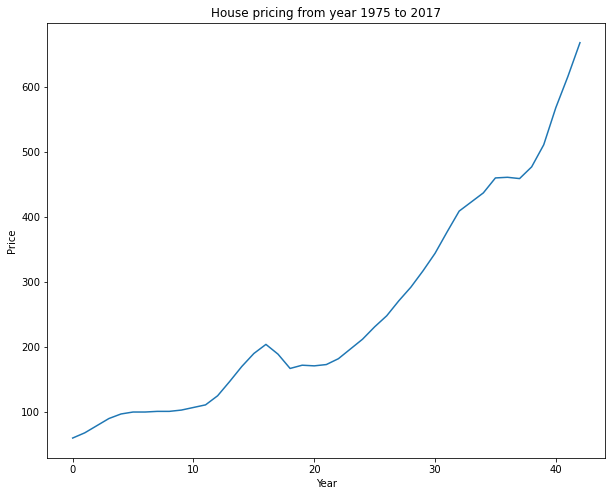

In [684]:
plt.figure(figsize=(10, 8))                                 # Size of window holding the plot.
plt.plot(housingPriceX, housingPriceY)                      # Plot regression line.
plt.title("House pricing from year 1975 to 2017")           # Title of plot.
plt.xlabel("Year")                                          # Name for x label.
plt.ylabel("Price")                                         # Name for y label.
plt.show()

<b> Exercise 2.2:  Which polynomial degree do you think gives the best fit? </b>

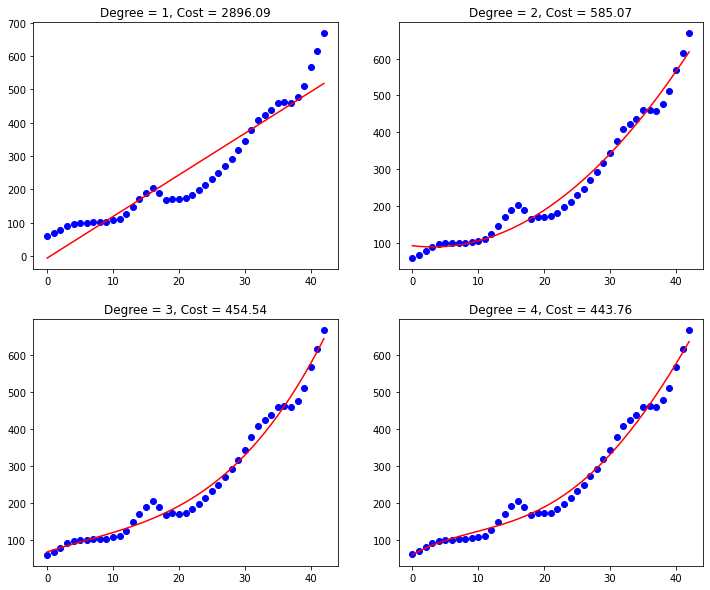

In [685]:
Xne = np.c_[np.ones((n,1))]                                                         # Matrix holding only ones.
X = Xne                                                                             # X that will hold current model.
predictionY = []
beta = []
plt.figure(figsize=(12, 10))                                                        # Size of window holding the plot.
for i in range(1,5):                                                                # Loop for each degree.
    X = np.insert(X, len(X[0]) , housingPriceX**i, axis = 1)                        # Reform to higher degree model.
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(housingPriceY)                    # Create new beta with higher degree model.
    predictionY = np.dot(X,beta)                                                    # Precict Y, with new model.
    cost = (1/n)*np.dot( (np.dot(X,beta)-housingPriceY).T, (np.dot(X,beta)-housingPriceY))
    plt.subplot(2,2, i)                                                             # Current plot i.
    plt.title("Degree = " +str(i) +", Cost = " +str(round(cost,2)))                 # Current plot title, degree and cost.
    plt.plot(housingPriceX, housingPriceY, 'bo')                                    # Plot data graph.
    plt.plot(housingPriceX,predictionY, color='red')                                # Plot predicted model.  
plt.show()

We create four seperate models from degree 1-4 that will predict the Ys,  the cost for each model is calculated.

Degree 1 is under fit and gives a model that does not work well for the data set. The cost J(B) here is 2896.09

Degree 2 and 3 is much better models than degree 1 but the cost can be reduced even more.

Finally we have degree 4 which gives the best fit since it has the least cost J(B) 443.76 within degree 1-4. 


<b> Exercise 2.3:  Jonas Nordqvist bought in 2015 a house in Växjö for 2.3 million SEK. What can he expect
to get, using your “best fit model”, for his house when he (after completing his PhD) sells
his house in 2022 (to start his new career as a data scientist in Stockholm)? Is your answer
realistic? </b>

In [686]:
years = 47                                                                                 # Years from 1975.
print( (beta[0] + beta[1]*years + beta[2]*years**2 + beta[3]*years**3 + beta[4]*years**4)) # Print predicted price value.

799.3364217397591


Since the data set start from year 1975 we count the years from then.

This gives us 47, since 2022-1975 = 47. The variable years is used for this.

Runing this with f(X) = β0 + β1X + β2X^2 +β3X^3  + β4X^4 gives us the value:

<b> 799.3364217397591 </b>

This reult is not very realistic since the data set is not so large, and only one feature is used for prediction.

In real life there are many more variables that comes in mind when a house price is decided.

Using SCB: https://www.scb.se/en/finding-statistics/statistics-by-subject-area/housing-construction-and-building/real-estate-prices-and-registrations-of-title/real-estate-prices-and-registrations-of-title/pong/tables-and-graphs/real-estate-price-index/

SCB shows that the "Real estate price index" has today (2022) grown above 799.

In 2021 it was 872 (Easten Central Sweden), and it is still growing.

The prediction is close, but still far from the realistic a value.

A model with more features may be able to predict the coming house prices  more accurately.